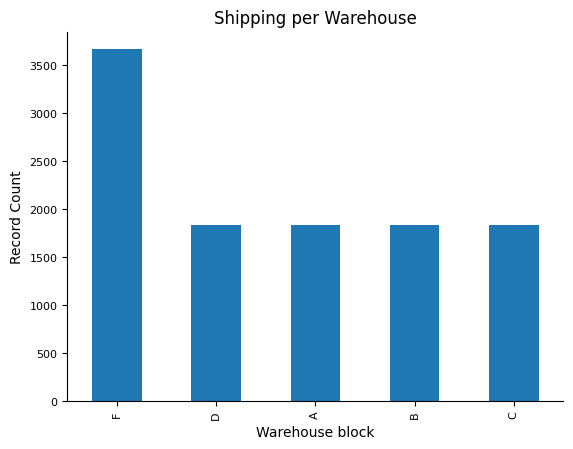

In [18]:
import os
import matplotlib.pyplot as plt
import pandas as pd

if not os.path.exists("docs"):
    os.makedirs("docs")

def load_data():
    df = pd.read_csv("../files/input/shipping-data.csv")
    return df

def create_visual_for_shipping_per_warehouse(df):
    df = df.copy()
    plt.figure()
    counts = df.Warehouse_block.value_counts()
    counts.plot.bar(
        title = "Shipping per Warehouse",
        xlabel = "Warehouse block",
        ylabel = "Record Count",
        color = "tab:blue",
        fontsize = 8,
    )
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

df = load_data()
create_visual_for_shipping_per_warehouse(df)

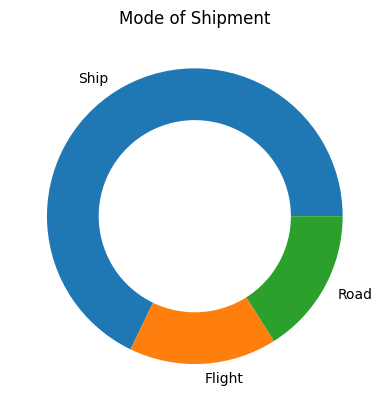

In [19]:
def create_visual_for_mode_of_shipment(df):
    df = df.copy()
    plt.figure()
    counts = df.Mode_of_Shipment.value_counts()
    counts.plot.pie(
        title = "Mode of Shipment",
        wedgeprops = dict(width=0.35),
        ylabel = "",
        color = ["tab:blue","tab:orage","tab:green"],
    )
create_visual_for_mode_of_shipment(df)

['tab:orange', 'tab:orange', 'tab:orange']

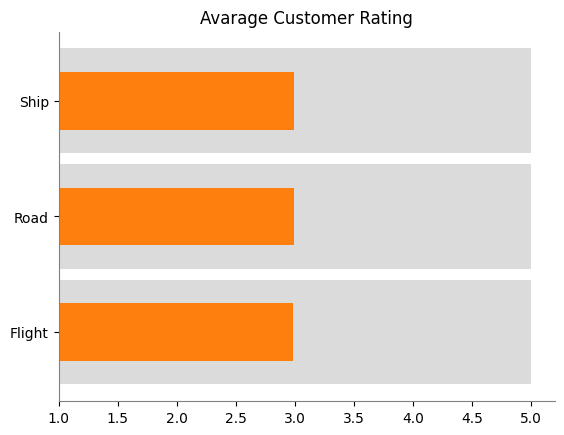

In [30]:

def create_visual_for_average_customer_rating(df):
    df = df.copy()
    plt.figure()
    df = (
        df[["Mode_of_Shipment", "Customer_rating"]]
        .groupby("Mode_of_Shipment")
        .describe()
    )
    
    df.columns = df.columns.droplevel()
    df = df[["mean", "min", "max"]]
    plt.barh(
        y=df.index.values,
        width=df["max"].values -1,
        left= df["min"].values,
        height=0.9,
        color="lightgray",
        alpha=0.8
    )
    colors = [
        "tab:green" if value >=3.0 else "tab:orange" for value in df["mean"].values
    ]
    plt.barh(
        y=df.index.values,
        width=df["mean"].values - 1,
        left= df["min"].values,
        color=colors,
        height=0.5,
        alpha=1.0,
    )

    plt.title("Avarage Customer Rating")
    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    return colors

create_visual_for_average_customer_rating(df)

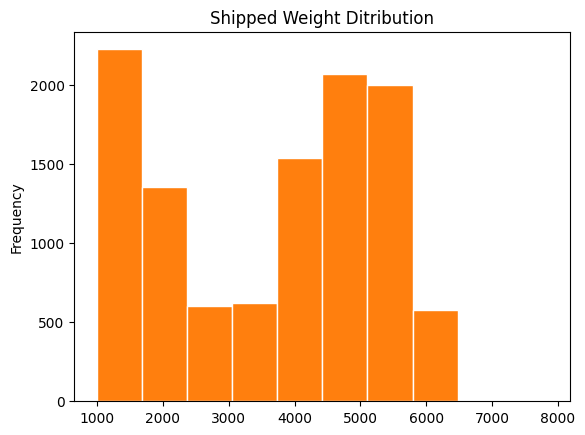

In [ ]:
def create_visual_for_weight_distribution(df):
    df = df.copy()
    plt.figure()
    df.Weight_in_gms.plot.hist(
        title = "Shipped Weight Ditribution",
        color = "tab:orange",
        edgecolor = "white",
    )
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

create_visual_for_weight_distribution(df)